In [5]:
#1
import csv, datetime
fn = 'trip_data_2.csv'
f = open(fn,'r')
reader = csv.reader(f)
row_count=0
for row in reader:
    #print(row)
    if row_count % 1000000 == 0:
        pass
    row_count+=1
print(row_count)

13990177


In [6]:
#1
import csv, datetime
fn = 'trip_data_2.csv'
f = open(fn,'r')
reader = csv.reader(f)
temp=0
min_val_datetime=None
max_val_datetime=None
for row in reader:
    if temp>0:
        dts=row[5]
        dto=None
        try:
            dto=datetime.datetime.strptime(dts,'%Y-%m-%d %H:%M:%S')
        except Exception as e:
            print(e)
        if dto is not None:
            if temp==1:
                min_val_datetime=dto
                max_val_datetime=dto
            elif dto < min_val_datetime:
                min_val_datetime=dto
            elif dto > max_val_datetime:
                max_val_datetime=dto
    temp+=1
    if temp > row_count:
        break
print('Minimum Value:',min_val_datetime,' Maximum Value:',max_val_datetime)

Minimum Value: 2013-02-01 00:00:00  Maximum Value: 2013-02-28 23:59:59


In [7]:
#3
import csv, datetime
fn = 'trip_data_2.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
for row in reader:
    print(row)
    if n > 5:
        break
    n+=1

['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
['1B5C0970F2AE8CFFBA8AE4584BEAED29', 'D961332334524990D1BBD462E2EFB8A4', 'CMT', '1', 'N', '2013-02-08 23:35:14', '2013-02-08 23:42:58', '1', '463', '.80', '-73.992439', '40.724487', '-73.984421', '40.718903']
['B42249AE16E2B8E556F1CB1F940D6FB4', 'D4BB308D1F3FCB3434D9DB282CDC93D7', 'CMT', '1', 'N', '2013-02-07 12:20:16', '2013-02-07 12:50:27', '4', '1810', '3.10', '-73.989494', '40.769588', '-73.990303', '40.737347']
['890699222C47C09FBC898758CEC69762', '6318C3AEC02248928C3345B5805EB905', 'CMT', '1', 'N', '2013-02-08 08:56:54', '2013-02-08 08:59:43', '1', '168', '1.00', '-73.963036', '40.799141', '-73.972168', '40.786446']
['74B7D835C2CD98606D5256DA8A38E045', 'D5E278C918256D1F97680A1F04D290E0', 'CMT', '1', 'N', '2013-02-08 09:37:02', '20

In [2]:
#5
import csv, datetime
fn = 'trip_data_2.csv'

count = 0
pickup_latitude_values = []
pickup_longitude_values = []
dropoff_latitude_values = []
dropoff_longitude_values = []

lat_min = 40.5 ;lat_max = 40.9
lon_min = -74.25 ;lon_max= -73.7


with open('trip_data_2.csv', 'r') as file:
    reader = csv.reader(file)

    next(reader)

    for row in reader:
        if(row[10] and row[11] and row[12] and row[13]):
            pickup_lat = float(row[11])
            pickup_lon = float(row[10])
            dropoff_lat = float(row[13])
            dropoff_lon = float(row[12])

        
            if(pickup_lat >= lat_min and pickup_lat <= lat_max):
                pickup_latitude_values.append(pickup_lat)
            if(pickup_lon >= lon_min and pickup_lon <= lon_max):
                pickup_longitude_values.append(pickup_lon)
            if(dropoff_lat >= lat_min and dropoff_lat <= lat_max):
                dropoff_latitude_values.append(dropoff_lat)
            if(dropoff_lon >= lon_min and dropoff_lon <= lon_max):
                dropoff_longitude_values.append(dropoff_lon)
        

    min_value_latitude_pickup = min(pickup_latitude_values)
    max_value_latitude_pickup = max(pickup_latitude_values)

    min_value_longitude_pickup = min(pickup_longitude_values)
    max_value_longitude_pickup = max(pickup_longitude_values)


    min_value_latitude_dropoff = min(dropoff_latitude_values)
    max_value_latitude_dropoff = max(dropoff_latitude_values)

    min_value_longitude_dropoff = min(dropoff_longitude_values)
    max_value_longitude_dropoff = max(dropoff_longitude_values)

    print(f"Minimum value in the 'pickup_latitude' row: {min_value_latitude_pickup}")
    print(f"Maximum value in the 'pickup_latitude' row: {max_value_latitude_pickup}")
    print(f"Minimum value in the 'pickup_longitude' row: {min_value_longitude_pickup}")
    print(f"Maximum value in the 'pickup_longitude' row: {max_value_longitude_pickup}")

    print(f"Minimum value in the 'dropoff_latitude' row: {min_value_latitude_dropoff}")
    print(f"Maximum value in the 'dropoff_latitude' row: {max_value_latitude_dropoff}")
    print(f"Minimum value in the 'dropoff_longitude' row: {min_value_longitude_dropoff}")
    print(f"Maximum value in the 'dropoff_longitude' row: {max_value_longitude_dropoff}")

Minimum value in the 'pickup_latitude' row: 40.5
Maximum value in the 'pickup_latitude' row: 40.899998
Minimum value in the 'pickup_longitude' row: -74.25
Maximum value in the 'pickup_longitude' row: -73.700035
Minimum value in the 'dropoff_latitude' row: 40.5
Maximum value in the 'dropoff_latitude' row: 40.899994
Minimum value in the 'dropoff_longitude' row: -74.25
Maximum value in the 'dropoff_longitude' row: -73.700005


Average Haversine Distance: 19.48 km


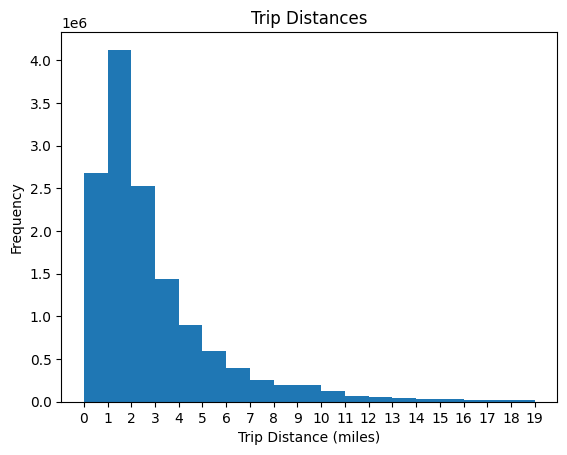

In [3]:
#6
import csv
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    lon1_radians, lat1_radians, lon2_radians, lat2_radians = map(radians, [lon1, lat1, lon2, lat2])

    delta_longitude = lon2_radians - lon1_radians 
    delta_latitude = lat2_radians - lat1_radians 
    a = sin(delta_latitude/2)**2 + cos(lat1_radians) * cos(lat2_radians) * sin(delta_longitude/2)**2
    c = 2 * asin(sqrt(a)) 
    earth_radius = 6371
    return c * earth_radius

with open('trip_data_2.csv', 'r') as file:
    reader = csv.reader(file)

    total_distance = 0.0
    exception_count = 0
    distance_list = []
    n = 0

    for row in reader:
        n += 1
        try:
            pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(float, [row[10], row[11], row[12], row[13]])

            distance = haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
            total_distance += distance
            distance_list.append(distance)
        except Exception as e:
            exception_count += 1

    print(f"Average Haversine Distance: {total_distance / (n - exception_count):.2f} km")


trip_distances = distance_list
x = np.arange(0, 20, 1)
plt.xticks(x)
plt.hist(trip_distances, bins=x)

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Trip Distances")

plt.savefig("hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
#7
import csv, datetime
fn = 'trip_data_2.csv'
f = open(fn,'r')
reader = csv.reader(f)
medallion={}
hack_license={}
vendor_id={}
rate_code={}
store_and_fwd_flag={}
pickup_datetime={}
dropoff_datetime={}
passenger_count={}
trip_time_in_secs={}
trip_distance={}
pickup_longitude={}
pickup_latitude={}
dropoff_longitude={}
dropoff_latitude={}

next(reader)
for row in reader:
    k=row[0]
    if k in medallion:
        medallion[k]+=1
    else:
        medallion[k]=1

    k=row[1]
    if k in hack_license:
        hack_license[k]+=1
    else:
        hack_license[k]=1

    k=row[2]
    if k in vendor_id:
        vendor_id[k]+=1
    else:
        vendor_id[k]=1

    k=row[3]
    if k in rate_code:
        rate_code[k]+=1
    else:
        rate_code[k]=1

    k=row[4]
    if k in store_and_fwd_flag:
        store_and_fwd_flag[k]+=1
    else:
        store_and_fwd_flag[k]=1

    k=row[5]
    if k in pickup_datetime:
        pickup_datetime[k]+=1
    else:
        pickup_datetime[k]=1

    k=row[6]
    if k in dropoff_datetime:
        dropoff_datetime[k]+=1
    else:
        dropoff_datetime[k]=1

    k=row[7]
    if k in passenger_count:
        passenger_count[k]+=1
    else:
        passenger_count[k]=1

    k=int(row[8])
    if k in trip_time_in_secs:
        trip_time_in_secs[k]+=1
    else:
        trip_time_in_secs[k]=1

    k=row[9]
    if k in trip_distance:
        trip_distance[k]+=1
    else:
        trip_distance[k]=1

    k=row[10]
    if k in pickup_longitude:
        pickup_longitude[k]+=1
    else:
        pickup_longitude[k]=1

    k=row[11]
    if k in pickup_latitude:
        pickup_latitude[k]+=1
    else:
        pickup_latitude[k]=1

    k=row[12]
    if k in dropoff_longitude:
        dropoff_longitude[k]+=1
    else:
        dropoff_longitude[k]=1

    k=row[13]
    if k in dropoff_latitude:
        dropoff_latitude[k]+=1
    else:
        dropoff_latitude[k]=1
    # if n % 1000000 == 0:
    #     print(n)
    # n+=1

medallion=dict(sorted(medallion.items(),key=lambda item:item[1],reverse=True))
hack_license=dict(sorted(hack_license.items(),key=lambda item:item[1],reverse=True))
vendor_id=dict(sorted(vendor_id.items(),key=lambda item:item[1],reverse=True))
rate_code=dict(sorted(rate_code.items(),key=lambda item:item[1],reverse=True))
store_and_fwd_flag=dict(sorted(store_and_fwd_flag.items(),key=lambda item:item[1],reverse=True))
pickup_datetime=dict(sorted(pickup_datetime.items(),key=lambda item:item[1],reverse=True))
dropoff_datetime=dict(sorted(dropoff_datetime.items(),key=lambda item:item[1],reverse=True))
passenger_count=dict(sorted(passenger_count.items(),key=lambda item:item[1],reverse=True))
trip_time_in_secs=dict(sorted(trip_time_in_secs.items(),key=lambda item:item[1],reverse=True))
trip_distance=dict(sorted(trip_distance.items(),key=lambda item:item[1],reverse=True))
pickup_longitude=dict(sorted(pickup_longitude.items(),key=lambda item:item[1],reverse=True))
pickup_latitude=dict(sorted(pickup_longitude.items(),key=lambda item:item[1],reverse=True))
dropoff_longitude=dict(sorted(dropoff_longitude.items(),key=lambda item:item[1],reverse=True))
dropoff_latitude=dict(sorted(dropoff_latitude.items(),key=lambda item:item[1],reverse=True))

print('medallion:',len(medallion))
print('hack license:',len(hack_license))
print('vendor id:',len(vendor_id))
print('rate code:',len(rate_code))
print('store and fwd flag:',len(store_and_fwd_flag))
print('pickup datetime:',len(pickup_datetime))
print('dropoff datetime:',len(dropoff_datetime))
print('passenger count:',len(passenger_count))
print('trip time in secs:',len(trip_time_in_secs))
print('trip distance:',len(trip_distance))
print('pickup longitude:',len(pickup_longitude))
print('pickup latitude:',len(pickup_latitude))
print('dropoff longitude:',len(dropoff_longitude))
print('dropoff latitude:',len(dropoff_latitude))

medallion: 13415
hack license: 32062
vendor id: 2
rate code: 12
store and fwd flag: 3
pickup datetime: 2099113
dropoff datetime: 2101381
passenger count: 12
trip time in secs: 6159
trip distance: 4233
pickup longitude: 40276
pickup latitude: 40276
dropoff longitude: 56207
dropoff latitude: 88544


In [9]:
#8
import csv, datetime
fn = 'trip_data_2.csv'
f = open(fn,'r')
reader = csv.reader(f)
temp=0
min_val_datetime=None
max_val_datetime=None
min_val_ratecode=None
max_val_ratecode=None
min_val_passenger_count=None
max_val_passenger_count=None
min_val_trip_time=None
max_val_trip_time=None
for row in reader:
    if temp>0:
        #min and max for rate_code
        n=row[3]
        if temp==1:
            min_val_ratecode=n
            max_val_ratecode=n
        elif n < min_val_ratecode:
            min_val_ratecode=n
        elif n > max_val_ratecode:
            max_val_ratecode=n

        #min and max for passenger_count
        n=int(row[7])
        if n is not None:
            if temp==1:
                min_val_passenger_count=n
                max_val_passenger_count=n
            elif n < min_val_passenger_count:
                min_val_passenger_count=n
            elif n > max_val_passenger_count:
                max_val_passenger_count=n
        
        #min and max for trip_time_in_secs
        n=int(row[8])
        if n is not None:
            if temp==1:
                min_val_trip_time=n
                max_val_trip_time=n
            elif n < min_val_trip_time:
                min_val_trip_time=n
            elif n > max_val_trip_time:
                max_val_trip_time=n

        # min and max for datetime
        dts=row[5]
        dto=None
        try:
            dto=datetime.datetime.strptime(dts,'%Y-%m-%d %H:%M:%S')
        except Exception as e:
            print(e)
        if dto is not None:
            if temp==1:
                min_val_datetime=dto
                max_val_datetime=dto
            elif dto < min_val_datetime:
                min_val_datetime=dto
            elif dto > max_val_datetime:
                max_val_datetime=dto
    temp+=1
    if temp > row_count:
        break
print('Minimum Value of rate_code:',min_val_ratecode,' Maximum Value of rate_code:',max_val_ratecode)
print('Minimum Value of datetime:',min_val_datetime,' Maximum Value of datetime:',max_val_datetime)
print('Minimum Value of passenger count:',min_val_passenger_count,' Maximum Value of passenger count:',max_val_passenger_count)
print('Minimum Value of trip time in seconds:',min_val_trip_time,' Maximum Value of trip time in seconds:',max_val_trip_time)

Minimum Value of rate_code: 0  Maximum Value of rate_code: 79
Minimum Value of datetime: 2013-02-01 00:00:00  Maximum Value of datetime: 2013-02-28 23:59:59
Minimum Value of passenger count: 0  Maximum Value of passenger count: 208
Minimum Value of trip time in seconds: 0  Maximum Value of trip time in seconds: 10800


[1.7605710460390698, 1.7577571574669502, 1.757020022634902, 1.7563143647241217, 1.7163068815242728, 1.6028169014084508, 1.554187546244832, 1.5947585797869954, 1.624848783966196, 1.6265314339981007, 1.6539808622871415, 1.6726301706804845, 1.6746395193688166, 1.6836743906985414, 1.6929617909865202, 1.7183483951748004, 1.721255943910603, 1.7045470187271494, 1.7051555288689297, 1.7125476967938544, 1.7129610194273157, 1.7337663307018438, 1.750093585338211, 1.7614047640961845]


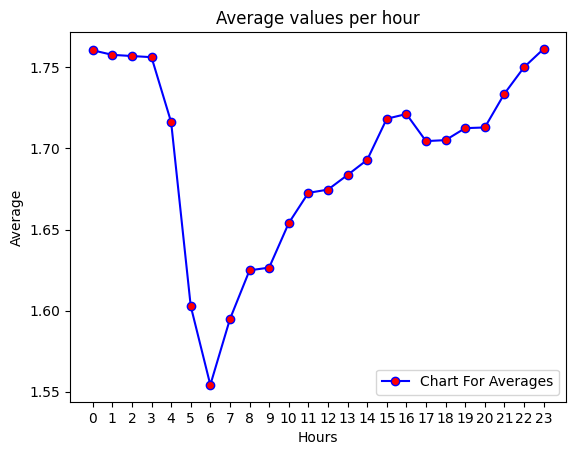

In [10]:
#9
import datetime
import csv
import matplotlib.pyplot as plt
import numpy as np

filename = 'trip_data_2.csv'
file = open(filename, 'r')
reader = csv.reader(file)

# Initialize variables
exception_count = 0
record_count = 0
passenger_count_list = [0] * 24
hourly_count_list = [0] * 24

next(reader)
# Loop through each row in the file
for row in reader:
    record_count += 1
    # Parse the date string into a datetime object
    try:
        date_str = row[5]
        datetime_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
        hour = datetime_obj.hour

    except Exception as e:
        exception_count += 1
        print(e)

    # Extract the hour of the day from the datetime object
    #hour = datetime_obj.hour

    # Parse the passenger count and update the hourly and total passenger count
    try:
        passenger_count = int(row[7])
        hourly_count_list[hour] += 1
        passenger_count_list[hour] += passenger_count
    except Exception as e:
        print(e)

averages = []

for i in range(len(hourly_count_list)):
 averages.append(passenger_count_list[i] / hourly_count_list[i])

print(averages)

data = averages
x =np.arange(0, 24, 1)
plt.xticks(x)
plt.plot(data, label= 'Chart For Averages', color='b', marker = 'o', markerfacecolor='r')
plt.xlabel('Hours')
plt.ylabel("Average")
plt.legend()
plt.title('Average values per hour')
plt.savefig('plotmain.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [14]:
#10
import csv

with open('trip_data_2.csv', 'r') as f:
    with open('reduced.csv', 'w', newline='') as g:
        writer = csv.writer(g)
        header = next(csv.reader(f))
        writer.writerow(header)
        for i, row in enumerate(csv.reader(f)):
            if i % 1000 == 0:
                writer.writerow(row)

[1.7562724014336917, 1.7698209718670077, 1.8086642599277978, 1.7671232876712328, 1.5763888888888888, 1.3984962406015038, 1.5503355704697988, 1.5318725099601593, 1.5530546623794212, 1.6204724409448819, 1.5395348837209302, 1.7338582677165355, 1.658640226628895, 1.6233183856502242, 1.7101063829787233, 1.755813953488372, 1.6457990115321253, 1.746288798920378, 1.7358943577430972, 1.7603583426651737, 1.6615017878426699, 1.7132442284325637, 1.8505291005291005, 1.7216]


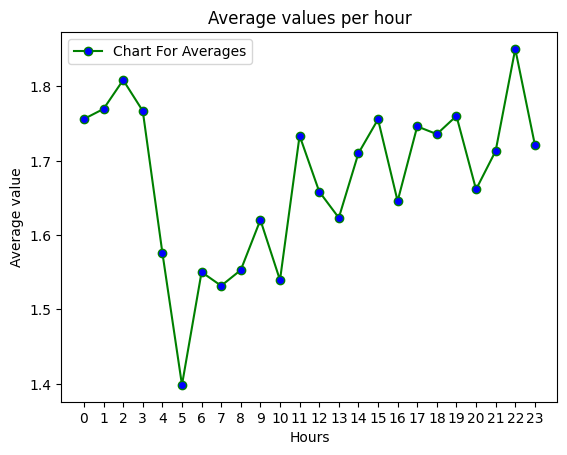

In [15]:
#11
import datetime
import csv
import matplotlib.pyplot as plt
import numpy as np

filename = 'reduced.csv'
file = open(filename, 'r')
reader = csv.reader(file)

exception_count = 0
record_count = 0
passenger_count_list = [0] * 24
hourly_count_list = [0] * 24

next(reader)
for row in reader:
    record_count += 1
    try:
        date_str = row[5]
        datetime_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
        hour = datetime_obj.hour

    except Exception as e:
        exception_count += 1
        print(e)
        
    try:
        passenger_count = int(row[7])
        hourly_count_list[hour] += 1
        passenger_count_list[hour] += passenger_count
    except Exception as e:
        print(e)

avg_passanger = []

for i in range(len(hourly_count_list)):
  avg_passanger.append(passenger_count_list[i] / hourly_count_list[i])

print(avg_passanger)

data = avg_passanger
x =np.arange(0, 24, 1)
plt.xticks(x)
plt.plot(data, label= 'Chart For Averages', color='g', marker = 'o', markerfacecolor='b')
plt.xlabel('Hours')
plt.ylabel("Average value")
plt.legend()
plt.title('Average values per hour')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()